In [55]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas.io.json import json_normalize

In [218]:
import lxml.html as lh
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

# Scrape boroughs from websites

In [13]:
url2='https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City'
source2=requests.get(url2).text
soup2=BeautifulSoup(source2,'lxml')

In [14]:
table_value=soup2.tbody
table_value=table_value.find_all('td')
table_value

[<td><a href="/wiki/Bronx_Community_Board_1" title="Bronx Community Board 1">Bronx CB 1</a></td>,
 <td align="right">7.17</td>,
 <td align="right">91,497</td>,
 <td align="right">12,761</td>,
 <td><a href="/wiki/Melrose,_Bronx" title="Melrose, Bronx">Melrose</a>, <a href="/wiki/Mott_Haven,_Bronx" title="Mott Haven, Bronx">Mott Haven</a>, <a href="/wiki/Port_Morris,_Bronx" title="Port Morris, Bronx">Port Morris</a>
 </td>,
 <td><a href="/wiki/Bronx_Community_Board_2" title="Bronx Community Board 2">Bronx CB 2</a></td>,
 <td align="right">5.54</td>,
 <td align="right">52,246</td>,
 <td align="right">9,792</td>,
 <td><a href="/wiki/Hunts_Point,_Bronx" title="Hunts Point, Bronx">Hunts Point</a>, <a href="/wiki/Longwood,_Bronx" title="Longwood, Bronx">Longwood</a>
 </td>,
 <td><a href="/wiki/Bronx_Community_Board_3" title="Bronx Community Board 3">Bronx CB 3</a></td>,
 <td align="right">4.07</td>,
 <td align="right">79,762</td>,
 <td align="right">19,598</td>,
 <td><a class="mw-redirect" hr

In [15]:
Cb=[]
Area=[]
Popc=[]
Popa=[]
Nei=[]
for n in range(0,len(table_value),5):
    
    Cb.append(table_value[n].text.replace('\xa0',' '))
    Area.append(table_value[n+1].text)
    Popc.append(table_value[n+2].text)
    Popa.append(table_value[n+3].text)
    Nei.append(table_value[n+4].text.split('\n')[0])

# Obtain Geological Location

In [16]:
Lat=[]
Lon=[]
for i in range(0,len(Cb)):
    address ='{}, New York City, NY'.format(Nei[i].split(',')[0])
    geolocator = Nominatim(user_agent="ny_explorer")
    try:
        location = geolocator.geocode(address)
        Lat.append(location.latitude)
        Lon.append(location.longitude)
    except:
        address ='{}, New York City, NY'.format(Nei[i].split(',')[1])
        location = geolocator.geocode(address)
        Lat.append(location.latitude)
        Lon.append(location.longitude)

In [17]:
ar_f=[]
for cb,area,popc,popa,nei,lat,lon in zip(Cb,Area,Popc,Popa,Nei,Lat,Lon):
    ar_f.append({'Community Board':cb,'Area/km2':area,'Pop.Census':popc,'Pop/km2':popa,'Neighborhoods':nei,
                'Latitude':lat,'Longitude':lon})
df2= pd.DataFrame(ar_f)
df2=df2[['Community Board','Area/km2','Pop.Census','Pop/km2','Neighborhoods','Latitude','Longitude']]
df2

,Community Board,Area/km2,Pop.Census,Pop/km2,Neighborhoods,Latitude,Longitude
0,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",40.824545,-73.910414
1,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood",40.812601,-73.884025
2,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",40.839876,-73.907328
3,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge",40.874217,-73.890410
4,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",40.859267,-73.898469
5,Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms",40.855278,-73.886389
6,Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights",40.870100,-73.885691
7,Bronx CB 8,8.83,"101,731","11,521","Fieldston, Kingsbridge, Kingsbridge Heights, M...",40.894444,-73.903333
8,Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Poi...",40.850485,-73.840404
9,Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham ...",40.847456,-73.786466


In [18]:
df2.drop(index=59,inplace=True)#delete the last row which represents the whole city
df2

,Community Board,Area/km2,Pop.Census,Pop/km2,Neighborhoods,Latitude,Longitude
0,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",40.824545,-73.910414
1,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood",40.812601,-73.884025
2,Bronx CB 3,4.07,"79,762","19,598","Claremont, Concourse Village, Crotona Park, Mo...",40.839876,-73.907328
3,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge",40.874217,-73.890410
4,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",40.859267,-73.898469
5,Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms",40.855278,-73.886389
6,Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights",40.870100,-73.885691
7,Bronx CB 8,8.83,"101,731","11,521","Fieldston, Kingsbridge, Kingsbridge Heights, M...",40.894444,-73.903333
8,Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Poi...",40.850485,-73.840404
9,Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham ...",40.847456,-73.786466


## Obtain Venues in Neighborhoods 

In [19]:
CLIENT_ID = 'QPG4LS2XMXGC2KXOGFMHKXCTIACEGEYEKGT0BS3E0DAOXGDG' # your Foursquare ID
CLIENT_SECRET = 'WVWNOOZAJ11DOKZAKJWKPPD1LRRESFJFZ4BABL5RBDD50UT1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QPG4LS2XMXGC2KXOGFMHKXCTIACEGEYEKGT0BS3E0DAOXGDG
CLIENT_SECRET:WVWNOOZAJ11DOKZAKJWKPPD1LRRESFJFZ4BABL5RBDD50UT1


In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    LIMIT = 100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
map_result=getNearbyVenues(names=df2['Community Board'],
                           latitudes=df2['Latitude'],
                          longitudes=df2['Longitude'])

Bronx CB 1
Bronx CB 2
Bronx CB 3
Bronx CB 4
Bronx CB 5
Bronx CB 6
Bronx CB 7
Bronx CB 8
Bronx CB 9
Bronx CB 10
Bronx CB 11
Bronx CB 12
Brooklyn CB 1
Brooklyn CB 2
Brooklyn CB 3
Brooklyn CB 4
Brooklyn CB 5
Brooklyn CB 6
Brooklyn CB 7
Brooklyn CB 8
Brooklyn CB 9
Brooklyn CB 10
Brooklyn CB 11
Brooklyn CB 12
Brooklyn CB 13
Brooklyn CB 14
Brooklyn CB 15
Brooklyn CB 16
Brooklyn CB 17
Brooklyn CB 18
Manhattan CB 1
Manhattan CB 2
Manhattan CB 3
Manhattan CB 4
Manhattan CB 5
Manhattan CB 6
Manhattan CB 7
Manhattan CB 8
Manhattan CB 9
Manhattan CB 10
Manhattan CB 11
Manhattan CB 12
Queens CB 1
Queens CB 2
Queens CB 3
Queens CB 4
Queens CB 5
Queens CB 6
Queens CB 7
Queens CB 8
Queens CB 9
Queens CB 10
Queens CB 11
Queens CB 12
Queens CB 13
Queens CB 14
Staten Island CB 1
Staten Island CB 2
Staten Island CB 3


In [54]:
map_result

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx CB 1,40.824545,-73.910414,5956be26123a195de6701c2b,Porto Salvo,40.823887,-73.912910,Italian Restaurant
1,Bronx CB 1,40.824545,-73.910414,4fa534cee4b0fed4819dc7d4,Perry Coffee Shop.,40.823433,-73.910940,Diner
2,Bronx CB 1,40.824545,-73.910414,5591837d498ee4167d48bb73,Cinco de Mayo,40.822674,-73.911592,Mexican Restaurant
3,Bronx CB 1,40.824545,-73.910414,553980e0498e68099069f65c,Old Bronx Courthouse,40.822894,-73.909565,Art Gallery
4,Bronx CB 1,40.824545,-73.910414,4d38c0949ca8236a1b12aee8,Popeyes Louisiana Kitchen,40.824605,-73.909819,Fried Chicken Joint
5,Bronx CB 1,40.824545,-73.910414,4c6d654f65eda093577b4ed0,McDonald's,40.825183,-73.908625,Fast Food Restaurant
6,Bronx CB 1,40.824545,-73.910414,4ca84cbc14c337040abcd23b,CTown Supermarkets,40.823888,-73.909905,Supermarket
7,Bronx CB 1,40.824545,-73.910414,4e011a3a45dd1e4999dceb4e,Duane Reade,40.823881,-73.909203,Pharmacy
8,Bronx CB 1,40.824545,-73.910414,4c7d00cf744d8cfacd1dbc37,Dunkin',40.824453,-73.909197,Donut Shop
9,Bronx CB 1,40.824545,-73.910414,4bded394fe0e62b5b8fa0506,Days Inn Bronx-Yankee Stadium,40.827092,-73.912007,Hotel


In [23]:
map_result.shape

(2555, 7)

In [25]:
map_result['Venue Category'].unique()

array(['Italian Restaurant', 'Diner', 'Mexican Restaurant', 'Art Gallery',
       'Fried Chicken Joint', 'Fast Food Restaurant', 'Supermarket',
       'Donut Shop', 'Pharmacy', 'Hotel', 'Bus Station',
       'Check Cashing Service', 'Pizza Place', 'Laundromat',
       'Chinese Restaurant', 'Food Truck', 'Juice Bar', 'Deli / Bodega',
       'Discount Store', 'School', 'Spanish Restaurant', 'Bank',
       'Farmers Market', 'BBQ Joint', 'Restaurant', 'Waste Facility',
       'Park', 'Grocery Store', 'Moving Target', 'Pub', 'Theater', 'Gym',
       'Sandwich Place', 'Metro Station', 'Latin American Restaurant',
       'Gym / Fitness Center', 'African Restaurant', 'Music Venue',
       'Mobile Phone Shop', 'Bakery', 'Ice Cream Shop', 'Clothing Store',
       'Video Game Store', 'Sporting Goods Shop', 'Shoe Store',
       'Supplement Shop', 'Kids Store', 'Greek Restaurant',
       'Accessories Store', 'Electronics Store', 'Liquor Store',
       'Department Store', 'Thrift / Vintage Store', '

In [80]:
rr_df=map_result[map_result['Venue Category'].str.contains("Restaurant")]
rr_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx CB 1,40.824545,-73.910414,5956be26123a195de6701c2b,Porto Salvo,40.823887,-73.912910,Italian Restaurant
2,Bronx CB 1,40.824545,-73.910414,5591837d498ee4167d48bb73,Cinco de Mayo,40.822674,-73.911592,Mexican Restaurant
5,Bronx CB 1,40.824545,-73.910414,4c6d654f65eda093577b4ed0,McDonald's,40.825183,-73.908625,Fast Food Restaurant
12,Bronx CB 1,40.824545,-73.910414,4c66fc1f19f3c9b62f93a1ff,Merry Land,40.824474,-73.909709,Chinese Restaurant
24,Bronx CB 2,40.812601,-73.884025,4c9ca8fc54c8a1cd9e057c4b,Randall Restaurant,40.812523,-73.884353,Spanish Restaurant
30,Bronx CB 2,40.812601,-73.884025,5b901665dd70c5002c9f6cbc,City Tamale Inc,40.810160,-73.884653,Restaurant
36,Bronx CB 3,40.839876,-73.907328,4b6bcd44f964a52001192ce3,McDonald's,40.841786,-73.904739,Fast Food Restaurant
42,Bronx CB 4,40.874217,-73.890410,4e4d0389bd413c4cc66dfd84,Las Maravillas De Mexico,40.873135,-73.889019,Mexican Restaurant
46,Bronx CB 4,40.874217,-73.890410,4e2e08021838f1c552b6b8eb,Choi Yuan - Chinese Restaurant,40.873078,-73.889086,Chinese Restaurant
50,Bronx CB 4,40.874217,-73.890410,4e4d0387bd413c4cc66dfd72,Hung Hing Chinese Restaurant,40.871181,-73.886759,Chinese Restaurant


Select Pizza Place as the analysis target. There are 117 pizza places in New York City, which is the most among various types of restaurants.

In [44]:
cat_freq=pd.value_counts(map_result['Venue Category'])
cat_freq.head(80)

Pizza Place                        117
Italian Restaurant                  81
Bakery                              73
Deli / Bodega                       70
Coffee Shop                         66
Chinese Restaurant                  58
Café                                52
Mexican Restaurant                  48
Bar                                 44
Sandwich Place                      43
Pharmacy                            39
American Restaurant                 39
Gym                                 37
Art Gallery                         36
Park                                36
Grocery Store                       35
Donut Shop                          33
Bank                                33
Cocktail Bar                        31
Ice Cream Shop                      30
Sushi Restaurant                    30
Wine Shop                           26
Hotel                               26
Gym / Fitness Center                25
Mobile Phone Shop                   25
Latin American Restaurant

In [84]:
pp_df=map_result[map_result['Venue Category'].str.contains("Pizza")]
pp_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
11,Bronx CB 1,40.824545,-73.910414,4e4cf9c1bd413c4cc66dae95,Linda's Pizzeria,40.823803,-73.909060,Pizza Place
19,Bronx CB 1,40.824545,-73.910414,4df7be37aeb7f7c3b5436f7a,Little Caesars Pizza,40.820466,-73.912912,Pizza Place
27,Bronx CB 2,40.812601,-73.884025,4ca3e96c5720b1f78d0936ef,Fratellis Pizza Cafe,40.809804,-73.880760,Pizza Place
40,Bronx CB 4,40.874217,-73.890410,4afac66af964a520a11822e3,Jerome's Pizza,40.873107,-73.889050,Pizza Place
72,Bronx CB 5,40.859267,-73.898469,4bf329ef2d62952165ec5f58,Best Italian Pizza,40.862475,-73.896898,Pizza Place
113,Bronx CB 5,40.859267,-73.898469,4cb0f72d75ebb60cba60c9ad,Domino's Pizza,40.860348,-73.893130,Pizza Place
123,Bronx CB 5,40.859267,-73.898469,4ca680d1b7106dcba0d35ea5,Susie's Pizza,40.857657,-73.899782,Pizza Place
127,Bronx CB 5,40.859267,-73.898469,513fd3c3e4b0a8eca5f8b719,Joey Pepperoni's Pizza,40.862529,-73.898794,Pizza Place
134,Bronx CB 5,40.859267,-73.898469,5a272952fe37404aed37cf4e,Bella Pizza,40.862807,-73.901705,Pizza Place
138,Bronx CB 6,40.855278,-73.886389,4aabd3e6f964a5204a5a20e3,Zero Otto Nove,40.854714,-73.888388,Pizza Place


By venue_id, using Foursquare to acquire detailed information of each pizza place.

In [154]:
venue_id='4aabd3e6f964a5204a5a20e3'
url_venue = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url_venue).json()
result

{'meta': {'code': 200, 'requestId': '5db5c889342adf0038fad354'},
 'response': {'venue': {'id': '4aabd3e6f964a5204a5a20e3',
   'name': 'Zero Otto Nove',
   'contact': {'phone': '7182201027',
    'formattedPhone': '(718) 220-1027',
    'facebook': '129459203781025',
    'facebookUsername': 'ZeroOttoNove',
    'facebookName': 'Zero Otto Nove'},
   'location': {'address': '2357 Arthur Ave',
    'crossStreet': 'at E 186th St',
    'lat': 40.85471353015844,
    'lng': -73.88838751470229,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.85471353015844,
      'lng': -73.88838751470229}],
    'postalCode': '10458',
    'cc': 'US',
    'city': 'Bronx',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['2357 Arthur Ave (at E 186th St)',
     'Bronx, NY 10458',
     'United States']},
   'canonicalUrl': 'https://foursquare.com/v/zero-otto-nove/4aabd3e6f964a5204a5a20e3',
   'categories': [{'id': '4bf58dd8d48988d1ca941735',
     'name': 'Pizza Place',
     'plura

Select out Rating, Price, Likes, Photos, Tips into a dataframe. And drop those places without a rating.

In [114]:
pp=pp_df['id']
venue_info_lst=[]
for venue_id in pp:
    url_v = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url_v).json()
    name=result['response']['venue']['name']
    try:
        rating=result['response']['venue']['rating']
    except:
        rating=0
    try:
        price=result['response']['venue']['price']['tier']
    except:
        price=0
    try:
        like=result['response']['venue']['likes']['count']
    except:
        like=0
    try:
        photo=result['response']['venue']['photos']['count']
    except:
        photo=0
    try:
        tips=result['response']['venue']['tips']['count']
    except:
        tips=0
    
    venue_info_lst.append([venue_id,name,rating, price, like, photo, tips])
venue_info_df=pd.DataFrame([venue_info for venue_info in venue_info_lst])
venue_info_df.columns = ['id', 'Name', 'Rating','Price', 'Likes', 'Photos', 'Tips']
venue_info_df


,id,Name,Rating,Price,Likes,Photos,Tips
0,4e4cf9c1bd413c4cc66dae95,Linda's Pizzeria,0.0,1,0,4,0
1,4df7be37aeb7f7c3b5436f7a,Little Caesars Pizza,5.7,1,1,3,4
2,4ca3e96c5720b1f78d0936ef,Fratellis Pizza Cafe,6.8,1,3,3,5
3,4afac66af964a520a11822e3,Jerome's Pizza,7.5,1,6,7,8
4,4bf329ef2d62952165ec5f58,Best Italian Pizza,7.5,1,15,10,13
5,4cb0f72d75ebb60cba60c9ad,Domino's Pizza,6.3,1,2,3,3
6,4ca680d1b7106dcba0d35ea5,Susie's Pizza,0.0,1,3,2,0
7,513fd3c3e4b0a8eca5f8b719,Joey Pepperoni's Pizza,0.0,1,0,1,0
8,5a272952fe37404aed37cf4e,Bella Pizza,0.0,1,0,0,0
9,4aabd3e6f964a5204a5a20e3,Zero Otto Nove,9.1,3,231,144,76


In [184]:
pp_dff=venue_info_df[venue_info_df['Rating']!=0.0]
pp_dff

,id,Name,Rating,Price,Likes,Photos,Tips
1,4df7be37aeb7f7c3b5436f7a,Little Caesars Pizza,5.7,1,1,3,4
2,4ca3e96c5720b1f78d0936ef,Fratellis Pizza Cafe,6.8,1,3,3,5
3,4afac66af964a520a11822e3,Jerome's Pizza,7.5,1,6,7,8
4,4bf329ef2d62952165ec5f58,Best Italian Pizza,7.5,1,15,10,13
5,4cb0f72d75ebb60cba60c9ad,Domino's Pizza,6.3,1,2,3,3
9,4aabd3e6f964a5204a5a20e3,Zero Otto Nove,9.1,3,231,144,76
10,4aee1220f964a520ced121e3,Full Moon Pizzeria,8.7,2,114,95,42
11,4b140a90f964a520489c23e3,Bellini's Pizza,8.1,1,8,0,5
12,4b2a6ba8f964a520d9a824e3,Pugsley Pizza,8.6,1,58,36,21
13,4d03ef588620224bff0ba640,Catania's Pizzeria & Cafe Inc.,6.9,1,6,3,4


In [185]:
pp_info_cor=pp_dff.drop(['id','Name'],1)
pp_info_cor.corr()

,Rating,Price,Likes,Photos,Tips
Rating,1.000000,0.468022,0.493203,0.450074,0.510075
Price,0.468022,1.000000,0.624174,0.528872,0.713245
Likes,0.493203,0.624174,1.000000,0.868937,0.892418
Photos,0.450074,0.528872,0.868937,1.000000,0.829932
Tips,0.510075,0.713245,0.892418,0.829932,1.000000


Showing from the correlation matrix, Likes, Photos and Tips are highly correlated to each other. But Likes is not highly related to Rating. Customers who click Likes for some specific reasons but give lower ratings to the general performance might cause this low correlation. Therefore I choose Rating to represent the restaurant. Rating is somewhat correlated to Price, which indicates that the price might not affect impressions of customers on that place significantly.

# Obtain Neighborhood Info of Restaurants

In [159]:
pp_result=getNearbyVenues(names=pp_df['Venue'],
                           latitudes=pp_df['Venue Latitude'],
                          longitudes=pp_df['Venue Longitude'])

Linda's Pizzeria
Little Caesars Pizza
Fratellis Pizza Cafe
Jerome's Pizza
Best Italian Pizza
Domino's Pizza
Susie's Pizza
Joey Pepperoni's Pizza
Bella Pizza
Zero Otto Nove
Full Moon Pizzeria
Bellini's Pizza
Pugsley Pizza
Catania's Pizzeria & Cafe Inc.
Bella Pizza
My Place Family Pizza
Jerome's Pizza
Bedford Pizza
Rocco's Pizza Restaurant
The Famous Emilio's Pizza
Filomena's Pizza & Pasta
Carbo's Pizzeria
Screamer's Pizzeria
Russ Pizza
Italy Pizza
Saraghina
Bravi Ragazzi
Rocco Pizza III
Domino's Pizza
Little Caesars Pizza
Little Caesars Pizza
Papa John's Pizza
F&F Pizzeria
Brooklyn Pizza Market
Giardini Pizza
Via Roma Pizza Bar
Charles's Pizzeria
Luigi's Pizza
Royal Kings Pizza
Dominick's Pizza
Calabria
Basil Pizza & Wine Bar
Kingston Pizza
Pomodori
Calabria
Basil Pizza & Wine Bar
Kingston Pizza
Pomodori
Peppino's
Vesuvio Pizzeria & Restaurant
Rocco's Pizzeria
Lenny's Pizza
Pizza
Grotta Azzurra
Piccolo's
Jentana's Pizza
Amnon's Pizza
Pizza
Grotta Azzurra
Lenny's Pizza
La Bella Pizza Exp

In [160]:
pp_result

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Linda's Pizzeria,40.823803,-73.909060,5956be26123a195de6701c2b,Porto Salvo,40.823887,-73.912910,Italian Restaurant
1,Linda's Pizzeria,40.823803,-73.909060,4fa534cee4b0fed4819dc7d4,Perry Coffee Shop.,40.823433,-73.910940,Diner
2,Linda's Pizzeria,40.823803,-73.909060,4f0f4fe14fc6e3adf353a950,Blink Fitness,40.819543,-73.910554,Gym / Fitness Center
3,Linda's Pizzeria,40.823803,-73.909060,5591837d498ee4167d48bb73,Cinco de Mayo,40.822674,-73.911592,Mexican Restaurant
4,Linda's Pizzeria,40.823803,-73.909060,553980e0498e68099069f65c,Old Bronx Courthouse,40.822894,-73.909565,Art Gallery
5,Linda's Pizzeria,40.823803,-73.909060,542c31e1498e76106c273492,Blink Fitness St Ann's,40.819470,-73.910522,Gym
6,Linda's Pizzeria,40.823803,-73.909060,4d38c0949ca8236a1b12aee8,Popeyes Louisiana Kitchen,40.824605,-73.909819,Fried Chicken Joint
7,Linda's Pizzeria,40.823803,-73.909060,4c6d654f65eda093577b4ed0,McDonald's,40.825183,-73.908625,Fast Food Restaurant
8,Linda's Pizzeria,40.823803,-73.909060,4ca84cbc14c337040abcd23b,CTown Supermarkets,40.823888,-73.909905,Supermarket
9,Linda's Pizzeria,40.823803,-73.909060,4c7d00cf744d8cfacd1dbc37,Dunkin',40.824453,-73.909197,Donut Shop


In [211]:
pp_result2=pp_result[['id','Venue Latitude','Venue Longitude']].drop_duplicates(['id'])
pp_result2

,id,Venue Latitude,Venue Longitude
0,5956be26123a195de6701c2b,40.823887,-73.912910
1,4fa534cee4b0fed4819dc7d4,40.823433,-73.910940
2,4f0f4fe14fc6e3adf353a950,40.819543,-73.910554
3,5591837d498ee4167d48bb73,40.822674,-73.911592
4,553980e0498e68099069f65c,40.822894,-73.909565
5,542c31e1498e76106c273492,40.819470,-73.910522
6,4d38c0949ca8236a1b12aee8,40.824605,-73.909819
7,4c6d654f65eda093577b4ed0,40.825183,-73.908625
8,4ca84cbc14c337040abcd23b,40.823888,-73.909905
9,4c7d00cf744d8cfacd1dbc37,40.824453,-73.909197


In [167]:
pp_venues = pd.get_dummies(pp_result[['Venue Category']], prefix="", prefix_sep="")
pp_venues

,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
pp_venues.insert(0,'PizzaPlace',pp_result['Neighborhood'])
pp_venues

,PizzaPlace,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Linda's Pizzeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
pp_grouped = pp_venues.groupby('PizzaPlace').sum().reset_index()
pp_grouped

,PizzaPlace,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Amnon's Pizza,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Angelo's Pizza & Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Basil Pizza & Wine Bar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bedford Pizza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bella Pizza,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,Bellini's Pizza,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Best Italian Pizza,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bravi Ragazzi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
8,Brooklyn Pizza II,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,Brooklyn Pizza Market,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,3,2,1,1,0


In [365]:
pp_grouped2 = pp_venues.groupby('PizzaPlace').mean().reset_index()
pp_clustering3 = pp_grouped2.drop(['PizzaPlace'], 1)

# Clustering

In [370]:
# set number of clusters
kclusters2 = 6
pp_clustering2 = pp_grouped.drop(['PizzaPlace'], 1)
# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters2, random_state=0).fit(pp_clustering2)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[-10:-1] 

array([1, 1, 0, 1, 0, 1, 1, 4, 2])

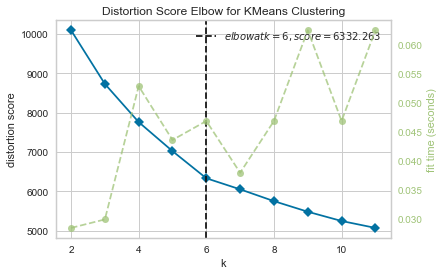

In [369]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(pp_clustering2)        # Fit the data to the visualizer
visualizer.show()   

In [374]:
pp_grouped.insert(1, 'ClusterLabels', kmeans2.labels_)
pp_grouped

,PizzaPlace,ClusterLabels,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arepa Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Amnon's Pizza,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Angelo's Pizza & Restaurant,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Basil Pizza & Wine Bar,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bedford Pizza,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bella Pizza,4,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,Bellini's Pizza,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Best Italian Pizza,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bravi Ragazzi,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
8,Brooklyn Pizza II,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,Brooklyn Pizza Market,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,3,2,1,1,0


In [375]:
pp_final=pp_grouped[['PizzaPlace','ClusterLabels']].merge(pp_dff,left_on='PizzaPlace',right_on='Name')
pp_final=pp_final.drop(['Name'],1)
pp_final=pp_final.merge(pp_result2,on=['id'])
pp_final=pp_final.sort_values(by=['Rating'],ascending=False)
pp_final

,PizzaPlace,ClusterLabels,id,Rating,Price,Likes,Photos,Tips,Venue Latitude,Venue Longitude
90,Sottocasa Pizzeria - Harlem,2,56e86a57cd1017cb53f3e8f9,9.4,1,87,39,29,40.805550,-73.947435
88,Saraghina,1,4a593de0f964a52015b91fe3,9.2,2,736,432,204,40.683590,-73.935340
63,Nick's Pizza,1,45ac11b0f964a5205b411fe3,9.1,2,191,143,94,40.718180,-73.840692
98,Zero Otto Nove,4,4aabd3e6f964a5204a5a20e3,9.1,3,231,144,76,40.854714,-73.888388
79,Posto,0,43c4bb46f964a5205a2d1fe3,9.0,2,346,146,121,40.734737,-73.983049
100,babbalucci,2,55a4456a498e29417f5c71a2,9.0,2,92,73,30,40.808875,-73.944796
47,La Villa Pizzeria,1,4b193722f964a52056d923e3,8.9,2,75,42,40,40.616867,-73.909858
73,Peppino's,1,4b58f8f2f964a5203f7628e3,8.8,1,32,24,16,40.629851,-74.028481
93,Vesuvio Pizzeria & Restaurant,0,4b3eaefff964a520bfa025e3,8.8,2,105,80,149,40.632580,-74.027096
23,F&F Pizzeria,0,5d56bcea6ac2400008de14d9,8.8,1,15,13,0,40.677342,-73.998162


In [376]:
import folium
# create map
map_final = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters2)
ys = [i + x + (i*x)**2 for i in range(kclusters2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pp_final['Venue Latitude'], pp_final['Venue Longitude'],  pp_final['PizzaPlace'], pp_final['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_final)
       
map_final

In [377]:
pp_exp1=pp_final.groupby(['ClusterLabels'])['Rating'].median()
pp_exp1

ClusterLabels
0    8.30
1    7.45
2    7.25
3    6.40
4    8.40
5    7.80
Name: Rating, dtype: float64

In [378]:
import statistics 
pp_exp2=pp_final.groupby(['ClusterLabels'])['Price'].apply(statistics.mode)
pp_exp2

ClusterLabels
0    1
1    1
2    1
3    1
4    1
5    1
Name: Price, dtype: int64

In [228]:
 from scipy import stats

In [240]:
 stats.f_oneway(pp_final['ClusterLabels'],pp_final['Rating'])

F_onewayResult(statistic=1043.705817516981, pvalue=2.6288992377794986e-81)

In [379]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(pp_final['Rating'],pp_final['ClusterLabels'])

print(mc.tukeyhsd())
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.871 0.0044 -1.5518 -0.1901   True
     0      2  -0.7924 0.0472 -1.5789 -0.0058   True
     0      3  -1.7924  0.001 -2.7425 -0.8422   True
     0      4   0.0176    0.9 -1.3073  1.3426  False
     0      5  -0.4157   0.89 -1.5478  0.7165  False
     1      2   0.0786    0.9 -0.5643  0.7216  False
     1      3  -0.9214 0.0218 -1.7566 -0.0861   True
     1      4   0.8886 0.3087 -0.3565  2.1337  False
     1      5   0.4553 0.7714 -0.5823  1.4929  False
     2      3     -1.0 0.0258 -1.9234 -0.0766   True
     2      4     0.81 0.4693 -0.4959  2.1159  False
     2      5   0.3767    0.9 -0.7331  1.4864  False
     3      4     1.81 0.0043  0.3995  3.2205   True
     3      5   1.3767 0.0192  0.1455  2.6079   True
     4      5  -0.4333    0.9 -1.9723  1.1057  False
----------------------------------------------

In [246]:
pp_cb=pp_df[['Neighborhood','id']].merge(pp_final,on='id')
pp_cb

,Neighborhood,id,PizzaPlace,ClusterLabels,Rating,Price,Likes,Photos,Tips,Venue Latitude,Venue Longitude
0,Bronx CB 1,4df7be37aeb7f7c3b5436f7a,Little Caesars Pizza,0,5.7,1,1,3,4,40.820466,-73.912912
1,Bronx CB 2,4ca3e96c5720b1f78d0936ef,Fratellis Pizza Cafe,3,6.8,1,3,3,5,40.809804,-73.880760
2,Bronx CB 4,4afac66af964a520a11822e3,Jerome's Pizza,3,7.5,1,6,7,8,40.873107,-73.889050
3,Bronx CB 4,4afac66af964a520a11822e3,Jerome's Pizza,3,7.5,1,6,7,8,40.873107,-73.889050
4,Bronx CB 7,4afac66af964a520a11822e3,Jerome's Pizza,3,7.5,1,6,7,8,40.873107,-73.889050
5,Bronx CB 7,4afac66af964a520a11822e3,Jerome's Pizza,3,7.5,1,6,7,8,40.873107,-73.889050
6,Bronx CB 5,4bf329ef2d62952165ec5f58,Best Italian Pizza,3,7.5,1,15,10,13,40.862475,-73.896898
7,Bronx CB 5,4cb0f72d75ebb60cba60c9ad,Domino's Pizza,2,6.3,1,2,3,3,40.860348,-73.893130
8,Bronx CB 6,4aabd3e6f964a5204a5a20e3,Zero Otto Nove,1,9.1,3,231,144,76,40.854714,-73.888388
9,Bronx CB 6,4aee1220f964a520ced121e3,Full Moon Pizzeria,1,8.7,2,114,95,42,40.855506,-73.887557


In [310]:
pp_cb_r2=pp_cb.groupby(['Neighborhood'])['Rating'].mean()
pp_cb_r2=pd.DataFrame(pp_cb_r2)

In [317]:
pp_cb_f=df2.merge(pp_cb_r2,right_on='Neighborhood',left_on='Community Board')
pp_cb_f

,Community Board,Area/km2,Pop.Census,Pop/km2,Neighborhoods,Latitude,Longitude,Rating
0,Bronx CB 1,7.17,"91,497","12,761","Melrose, Mott Haven, Port Morris",40.824545,-73.910414,5.700000
1,Bronx CB 2,5.54,"52,246","9,792","Hunts Point, Longwood",40.812601,-73.884025,6.800000
2,Bronx CB 4,5.28,"146,441","27,735","Concourse, Highbridge",40.874217,-73.890410,7.500000
3,Bronx CB 5,3.55,"128,200","36,145","Fordham, Morris Heights, Mount Hope, Universit...",40.859267,-73.898469,6.900000
4,Bronx CB 6,4.01,"83,268","20,765","Bathgate, Belmont, East Tremont, West Farms",40.855278,-73.886389,8.280000
5,Bronx CB 7,4.84,"139,286","28,778","Bedford Park, Norwood, University Heights",40.870100,-73.885691,7.533333
6,Bronx CB 9,12.41,"172,298","13,884","Bronx River, Bruckner, Castle Hill, Clason Poi...",40.850485,-73.840404,6.100000
7,Bronx CB 10,16.76,"120,392","7,183","City Island, Co-op City, Locust Point, Pelham ...",40.847456,-73.786466,6.700000
8,Brooklyn CB 1,12.82,"160,338","12,507","Greenpoint, Williamsburg",40.723713,-73.950971,7.900000
9,Brooklyn CB 3,7.67,"143,867","18,757","Bedford-Stuyvesant, Ocean Hill, Stuyvesant Hei...",40.683436,-73.941249,7.260000


In [318]:
pp_cb_f['Pop/km2']=pp_cb_f['Pop/km2'].apply(lambda s: s.replace(',',''))
pp_cb_f['Pop.Census']=pp_cb_f['Pop.Census'].apply(lambda s: s.replace(',',''))
pp_cb_f['Area/km2']=pp_cb_f['Area/km2'].apply(lambda s: s.replace(',',''))
pd.to_numeric(pp_cb_f['Pop/km2'])
pd.to_numeric(pp_cb_f['Area/km2'])
pd.to_numeric(pp_cb_f['Pop.Census'])
pp_cb_f

,Community Board,Area/km2,Pop.Census,Pop/km2,Neighborhoods,Latitude,Longitude,Rating
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris",40.824545,-73.910414,5.700000
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood",40.812601,-73.884025,6.800000
2,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge",40.874217,-73.890410,7.500000
3,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit...",40.859267,-73.898469,6.900000
4,Bronx CB 6,4.01,83268,20765,"Bathgate, Belmont, East Tremont, West Farms",40.855278,-73.886389,8.280000
5,Bronx CB 7,4.84,139286,28778,"Bedford Park, Norwood, University Heights",40.870100,-73.885691,7.533333
6,Bronx CB 9,12.41,172298,13884,"Bronx River, Bruckner, Castle Hill, Clason Poi...",40.850485,-73.840404,6.100000
7,Bronx CB 10,16.76,120392,7183,"City Island, Co-op City, Locust Point, Pelham ...",40.847456,-73.786466,6.700000
8,Brooklyn CB 1,12.82,160338,12507,"Greenpoint, Williamsburg",40.723713,-73.950971,7.900000
9,Brooklyn CB 3,7.67,143867,18757,"Bedford-Stuyvesant, Ocean Hill, Stuyvesant Hei...",40.683436,-73.941249,7.260000


In [385]:
pp_high=pp_grouped[(pp_grouped['ClusterLabels']==0) | (pp_grouped['ClusterLabels']==4)]
pp_high

,PizzaPlace,ClusterLabels,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arepa Restaurant,...,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
4,Bella Pizza,4,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,Bellini's Pizza,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Brooklyn Pizza Market,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,3,2,1,1,0
14,Catania's Pizzeria & Cafe Inc.,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20,Donna Margherita,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,1,0
21,F&F Pizzeria,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
25,Full Moon Pizzeria,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Giardini Pizza,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,3,1,0,1
32,Gruppo,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,5,1,0,0,0
33,Italy Pizza,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,4


In [386]:
pp_high=pp_high.ix[:,~(pp_high==0).all()]

C:\Users\Gary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [387]:
del pp_high['PizzaPlace']

In [388]:
pp_unknown=pp_high.groupby('ClusterLabels').mean()
pp_unknown=numpy.transpose(pp_unknown)
pp_unknown

ClusterLabels,0,4
Afghan Restaurant,0.222222,0.0
American Restaurant,1.111111,1.0
Animal Shelter,0.055556,0.0
Antique Shop,0.222222,0.0
Argentinian Restaurant,0.166667,0.0
Art Gallery,0.500000,0.0
Art Museum,0.111111,0.0
Arts & Crafts Store,0.444444,0.0
Asian Restaurant,0.277778,0.0
Athletics & Sports,0.000000,0.2


In [389]:
pp_unknown.sort_values(by=0 & 1, ascending=False).head(10)

ClusterLabels,0,4
Coffee Shop,5.111111,0.2
Pizza Place,3.666667,5.8
Italian Restaurant,3.500000,16.2
Bar,2.388889,1.4
Café,2.333333,1.0
Sushi Restaurant,2.055556,0.0
Cocktail Bar,1.833333,0.0
Gym / Fitness Center,1.777778,0.4
Ice Cream Shop,1.777778,0.0
Bakery,1.722222,5.2
